# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [24]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random
import seaborn as sns
from utils import KeyMethods
from utils.LinearRegression import linear_regression

In [2]:
class ScrapeAmazonLink():
    def __init__(self, URL : str):
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
        webpage = requests.get(URL, headers=headers)
        self.soup = BeautifulSoup(webpage.content, "html.parser")

        self.title = self.GetProductTitle()
        self.price = self.GetProductCost()
        self.reviews = self.GetRatingAmount()
        self.stars = self.GetStars()

    def GetDescription(self):
        return {"title" : self.title, "price" : self.price, "reviews" : self.reviews, "stars" : self.stars}

    def GetProductTitle(self) -> str:
        try:
            title = self.soup.find("span", attrs={"id": 'productTitle'}) 
            title_value = title.string

            title_string = title_value.strip().replace(',', '')

        except AttributeError:

            title_string = "NA"

        return title_string

    def GetProductCost(self) -> str:
        try:
            price = self.soup.find("span", class_="a-offscreen")
            price_value = price.get_text(strip=True)

            price_string = price_value.replace(',', '')

        except AttributeError:
            price_string = "NA"

        return price_string

    def GetRatingAmount(self) -> str:
        try:
            reviews = self.soup.find("span", id="acrCustomerReviewText")
            review_value = reviews.get_text(strip=True)

            review_string = review_value.replace(',', '')
        except AttributeError:
            review_string = "NA"

        return review_string

    def GetStars(self) -> str:
        try:
            stars = self.soup.find("span", id="acrPopover")
            star_value = stars.get_text(strip=True)

            stars_string = star_value.replace(',', '')
        except AttributeError:
            stars_string = "NA"

        return stars_string

This class here sorts through an Amazon product link looking for a product title, product price, the amount of reviews on a product, and how many stars a products has. Due to anti bot stuff Amazon put in we can't count on each product's html being the same. This is where the try and except functions come into play.

In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import time

service = webdriver.ChromeService()
driver = webdriver.Chrome(service=service)

# Function to scrape links
def scrape_amazon_links_with_selenium(max_links=5):
    product_links = []
    categories = {
        "electronics" : 0,
        "books" : 0,
        "toys" : 0,
        "kitchen" : 0,
        "beauty" : 0,
        "fitness" : 0,
        "fashion" : 0,
        "gaming" : 0,
        "home-improvement" : 0,
        "pet-supplies" : 0,
    }

    base_url = "https://www.amazon.com/s?k="
    try:
        while len(product_links) <= max_links:
            random_category = random.choice(list(categories.keys()))
            print(random_category)
            page = categories[random_category]
            url = f"{base_url}{random_category}&page={page}"
            print(f"Scraping Category: {random_category}, Page: {page} - URL: {url}")
            driver.get(url)
            time.sleep(5)

            elements = driver.find_elements(By.XPATH, '//a[contains(@href, "/dp/")]')
            for element in elements:
                product_url = element.get_attribute("href").split("?")[0]
                if product_url not in product_links:
                    product_links.append(product_url)

                    print(f"Progress: {len(product_links)}")

            categories[random_category] += 1

    except:
        print(f"Error during scraping: {e}")

    finally:
        driver.quit()

    return product_links


links = scrape_amazon_links_with_selenium(max_links=7500)
print(f"Scraped {len(links)} product links.")

home-improvement
Scraping Category: home-improvement, Page: 0 - URL: https://www.amazon.com/s?k=home-improvement&page=0
Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15
Progress: 16
Progress: 17
Progress: 18
Progress: 19
Progress: 20
Progress: 21
Progress: 22
Progress: 23
Progress: 24
Progress: 25
Progress: 26
Progress: 27
Progress: 28
Progress: 29
Progress: 30
Progress: 31
Progress: 32
Progress: 33
Progress: 34
Progress: 35
Progress: 36
Progress: 37
Progress: 38
Progress: 39
Progress: 40
Progress: 41
Progress: 42
Progress: 43
Progress: 44
Progress: 45
Progress: 46
Progress: 47
Progress: 48
Progress: 49
Progress: 50
Progress: 51
Progress: 52
Progress: 53
Progress: 54
Progress: 55
Progress: 56
Progress: 57
Progress: 58
Progress: 59
Progress: 60
Progress: 61
Progress: 62
Progress: 63
Progress: 64
Progress: 65
Progress: 66
Progress: 67
Progress: 68
Progr

Used Selenium to gather the 1000 links. Amazons anit-bot stuff made it quite difficult to not use outside libraries.

In [60]:
with open('URLs.txt', 'w') as f:
    for link in links:
        f.write(link + '\n') 

I wasn't able to finish this in class and didn't feel like scanning Amazon at home, so I put everything in a text file.

In [61]:
product_descriptions = []
with open('URLs.txt', 'r') as file:
    lines = file.readlines()
    for link in lines:
        product_descriptions.append(ScrapeAmazonLink(link).GetDescription())
        print(f"progress = {len(product_descriptions)}")

progress = 1
progress = 2
progress = 3
progress = 4
progress = 5
progress = 6
progress = 7
progress = 8
progress = 9
progress = 10
progress = 11
progress = 12
progress = 13
progress = 14
progress = 15
progress = 16
progress = 17
progress = 18
progress = 19
progress = 20
progress = 21
progress = 22
progress = 23
progress = 24
progress = 25
progress = 26
progress = 27
progress = 28
progress = 29
progress = 30
progress = 31
progress = 32
progress = 33
progress = 34
progress = 35
progress = 36
progress = 37
progress = 38
progress = 39
progress = 40
progress = 41
progress = 42
progress = 43
progress = 44
progress = 45
progress = 46
progress = 47
progress = 48
progress = 49
progress = 50
progress = 51
progress = 52
progress = 53
progress = 54
progress = 55
progress = 56
progress = 57
progress = 58
progress = 59
progress = 60
progress = 61
progress = 62
progress = 63
progress = 64
progress = 65
progress = 66
progress = 67
progress = 68
progress = 69
progress = 70
progress = 71
progress = 72
p

This took forever to run. Should probably add some optimization in there.

In [62]:
product_descriptions

[{'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'Schylling NeeDoh Nice Cube - Sensory Squeeze Toy with Super Solid Squish - 2.25" Cube - Color May Vary (Pack of 1)',
  'price': '$9.50',
  'reviews': '5857 ratings',
  'stars': '4.14.1 out of 5 stars'},
 {'title': 'SHASHIBO Shape Shifting Box - Award-Winning Patented Fidget Cube w/ 36 Rare Earth Magnets - Transforms Into Over 70 Shapes Download Fun in Motion Toys Mobile App (Original Series - Spaced Out)',
  'price': '$24.99',
  'reviews': '60513 ratings',
  'stars': '4.64.6 out of 5 stars'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 'reviews': 'NA', 'stars': 'NA'},
 {'title': 'NA', 'price': 'NA', 're

In [105]:
filtered_descriptions = []
for description in product_descriptions:
    if description['title'] == 'NA' or description['title'] == '': 
        continue
    if description['price'] == 'NA' or description['price'] == '':
        continue
    if description['reviews'] == 'NA' or description['reviews'] == '':
        continue
    if description['stars'] == 'NA' or description['stars'] == '':
        continue
        
    filtered_descriptions.append(description)
        
len(filtered_descriptions)

1152

{'title': 'FOCO NFL Unisex-Adult NFL Plush Throw',
 'price': '',
 'reviews': '1046 ratings',
 'stars': '4.74.7 out of 5 stars'}

In [106]:
import csv

with open('products.csv','x', newline='') as f:
    w = csv.writer(f)
    w.writerow(filtered_descriptions[0].keys())
    for i in range(len(filtered_descriptions)):
        try:
            w.writerow(filtered_descriptions[i].values())
        except:
            print(f"error on line {i}")

error on line 183
error on line 210
error on line 214
error on line 215
error on line 320
error on line 331
error on line 397
error on line 684
error on line 694
error on line 747
error on line 943
error on line 986
error on line 1054
error on line 1055
error on line 1066
error on line 1126


To make it easier to transport between school and home I put all the data into a .csv

In [10]:
products = pd.read_csv('products.csv', encoding = "ISO-8859-1")

In [11]:
products

,title,price,reviews,stars
0,Schylling NeeDoh Nice Cube - Sensory Squeeze T...,$9.50,5857 ratings,4.14.1 out of 5 stars
1,SHASHIBO Shape Shifting Box - Award-Winning Pa...,$24.99,60513 ratings,4.64.6 out of 5 stars
2,Taco vs Burrito - The Wildly Popular Surprisin...,$19.99,26277 ratings,4.54.5 out of 5 stars
3,Paint Your Own Cat Lamp Kit Art Supplies Arts ...,$12.99,551 ratings,4.34.3 out of 5 stars
4,Original with App Used by Celebrities - MMA Ge...,$29.99,2464 ratings,3.93.9 out of 5 stars
...,...,...,...,...
1131,Kitchen Shears Heavy Duty Poultry Shears Meat ...,$25.99,747 ratings,4.64.6 out of 5 stars
1132,LEGO NINJAGO Source Dragon of Motion Adventure...,$149.99,33 ratings,4.64.6 out of 5 stars
1133,LEGO Marvel Hulk vs. Rhino Monster Truck Showd...,$19.99,5683 ratings,4.84.8 out of 5 stars
1134,Wooden Animals Puzzles for Kids Age 3 4 5 Year...,$22.99,238 ratings,4.54.5 out of 5 stars


In [12]:
purge_indexes = []

for i in range(len(products)):
    price = products.loc[i]['price']
    if '$' in price:
        products.loc[i, 'price'] = price.replace('$', '')
    else:
        purge_indexes.append(i)

    reviews = products.loc[i]['reviews']
    products.loc[i, 'reviews'] = reviews.split()[0]

    star = products.loc[i]['stars']
    products.loc[i, 'stars'] = star.split()[0][:-2]

products.drop(purge_indexes)

products["price"] = pd.to_numeric(products["price"], errors="coerce")
products["reviews"] = pd.to_numeric(products["reviews"], errors="coerce")
products["stars"] = pd.to_numeric(products["stars"], errors="coerce")


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    1136 non-null   object 
 1   price    1115 non-null   float64
 2   reviews  1136 non-null   int64  
 3   stars    1136 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 35.6+ KB


# My Question

Given ~1000 Amazon Products how does an items price affect it's stars.

# My Analysis

<Axes: xlabel='price', ylabel='stars'>

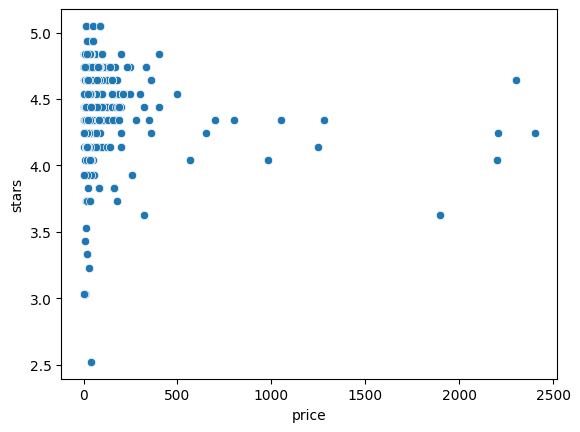

In [26]:
sns.scatterplot(data=products, x="price", y="stars")

This shows that while cost doesn't have a direct correlation to an object's stars, however usually the more costly and object is the lower the chances of it having a high review.

In [18]:
KeyMethods.KeyMethods.getFiveData(products, "stars")

{'max': np.float64(5.05),
 'Q3': np.float64(4.64),
 'Median': np.float64(4.54),
 'Q1': np.float64(4.34),
 'Min': np.float64(2.52)}

In [19]:
KeyMethods.KeyMethods.getStandardDeviation(products, "stars")

np.float64(0.2893035895066089)

In [20]:
KeyMethods.KeyMethods.getMean(products, "stars")

np.float64(4.467297535211268)

These show the overall data of the products. Let's split these values into a "cheap" category and an "expensive" category, then we'll run the same test. Due to the subjective nature of what makes something expensive, let's set a the "cheap" value to less than $100 and expensive as anything greater than $100.

In [31]:
cheap = []
expensive = []
for i in range(len(products)):
    price = products.loc[i]['price']
    if price <= 100:
        cheap.append(products.loc[i])
    else:
        expensive.append(products.loc[i])

cheap_df = pd.DataFrame(cheap)
expensive_df = pd.DataFrame(expensive)


In [32]:
expensive_df

,title,price,reviews,stars,predictions
27,Apple Pencil (2nd Generation): Pixel-Perfect P...,124.00,92201,4.74,NaN
46,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,169.97,12041,4.54,NaN
47,ASUS ROG Strix G16 (2024) Gaming Laptop 16 16...,1280.48,1504,4.34,NaN
57,Amazon Fire TV Stick 4K Pulse Red Core Wireles...,NaN,79021,4.64,NaN
58,Amazon Fire TV Stick 4K Robot White Core Wirel...,NaN,79021,4.64,NaN
...,...,...,...,...,...
1120,Alienware Pro Wireless Gaming Keyboard - Bluet...,199.99,26,4.14,NaN
1121,KTC 32 Inch FHD 1080p Curved Gaming Monitor - ...,189.99,412,4.44,NaN
1125,MAXPRO Fitness: Cable Home Gym | As Seen on Sh...,979.00,413,4.04,NaN
1128,Alienware X16 R2 Gaming Laptop - 16-inch QHD+ ...,2199.00,88,4.04,NaN


In [34]:
cheap_df

,title,price,reviews,stars,predictions
0,Schylling NeeDoh Nice Cube - Sensory Squeeze T...,9.50,5857,4.14,NaN
1,SHASHIBO Shape Shifting Box - Award-Winning Pa...,24.99,60513,4.64,NaN
2,Taco vs Burrito - The Wildly Popular Surprisin...,19.99,26277,4.54,NaN
3,Paint Your Own Cat Lamp Kit Art Supplies Arts ...,12.99,551,4.34,NaN
4,Original with App Used by Celebrities - MMA Ge...,29.99,2464,3.93,NaN
...,...,...,...,...,...
1130,Chom Chom Roller Mini for Pet Hair - Mini Chom...,24.99,314,4.34,NaN
1131,Kitchen Shears Heavy Duty Poultry Shears Meat ...,25.99,747,4.64,NaN
1133,LEGO Marvel Hulk vs. Rhino Monster Truck Showd...,19.99,5683,4.84,NaN
1134,Wooden Animals Puzzles for Kids Age 3 4 5 Year...,22.99,238,4.54,NaN


<Axes: xlabel='price', ylabel='stars'>

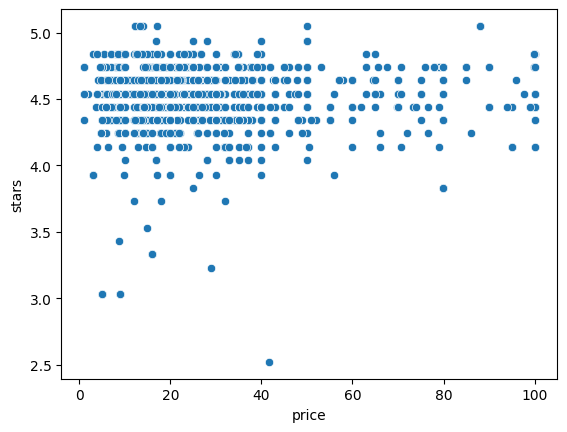

In [35]:
sns.scatterplot(data=cheap_df, x="price", y="stars")

In [37]:
KeyMethods.KeyMethods.getFiveData(cheap_df, "stars")

{'max': np.float64(5.05),
 'Q3': np.float64(4.64),
 'Median': np.float64(4.54),
 'Q1': np.float64(4.34),
 'Min': np.float64(2.52)}

In [39]:
KeyMethods.KeyMethods.getStandardDeviation(cheap_df, "stars")

np.float64(0.29040180593079074)

In [42]:
KeyMethods.KeyMethods.getMean(cheap_df, "stars")

np.float64(4.469647404505387)

<Axes: xlabel='price', ylabel='stars'>

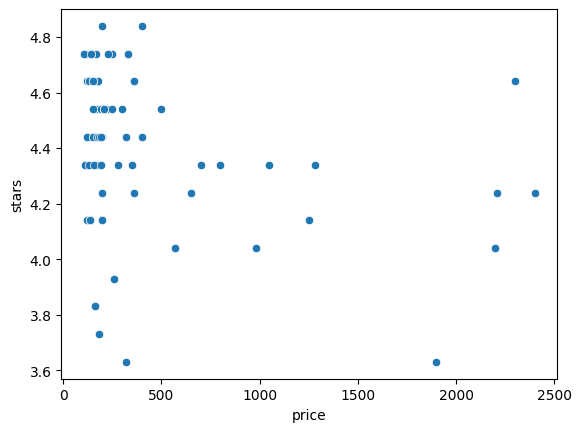

In [36]:
sns.scatterplot(data=expensive_df, x="price", y="stars")


In [38]:
KeyMethods.KeyMethods.getFiveData(expensive_df, "stars")

{'max': np.float64(5.05),
 'Q3': np.float64(4.64),
 'Median': np.float64(4.54),
 'Q1': np.float64(4.34),
 'Min': np.float64(3.63)}

In [40]:
KeyMethods.KeyMethods.getStandardDeviation(expensive_df, "stars")

np.float64(0.2797247748354632)

In [41]:
KeyMethods.KeyMethods.getMean(expensive_df, "stars")

np.float64(4.446434782608696)

# My Answer

While there isn't a direct correlation between a products price and a products stars, the products price does heavily affect the range of stars. The more costly an object is the lower the chances of it having poor stars. This is shown with the split data where the cheap products had a minimum of 2.52 stars while the minimum for the expensive products is 3.63 stars. The expensive products even have a lower standard of deviation by 0.02 so the range is tighter for the more expensive products. That being said, the cheaper products have a higher mean than the expensive products. The scatterplot backs this up since there are far more cheaper products and most of those products are clustered around the 3.5-5 stars range. The higher a products price the lower the smaller the range of stars is, but the cheaper products have a bigger range they have a better chance to be better reviewed products.